University of Central Asia 
Naryn, Kyrgyzstan 


**Data Science Project: Air quality prediction in Bishkek using different machine learning models.** 

**Scenario 2: Train and Test data split seasonal values.**

By Meerbek Akimzhanov, Kanykei Mairambekova, Rysgul Nurbekova 

Introduction: In our project, we decided to predict the air pollution index (AQIUS) based on the temperature, PM2.5 and PM10 levels, NO2 gas level on the air, and the humidity to preserve people's health by giving them an early warning about dangerous contaminants in the air. 



This prediction can be helpful in making the warning apps for the public: people can learn the air pollution level by hour beforehand and decide whether they need to go out at that particular time or not. 





The dataset originally was taken from http://data.movegreen.kg/ 


**Step 1:** importing the dataset



**Step 2:** Pre-processing: handling the missing values and making feature selection. 

a) The missing values were deleted as their amount was too high in order to eliminate the bias. Even though, half of the data was deleted because of containing the missing values, the amount of data in the another half will be relatively enough to make the prediction modeling without bias. 

b) Deleting the attributes that have zero or close to zero correlation (the correlations were checked in scenario 1 notebook) with the target variable as they have very small relevancy to the target variable. They are NO2(mkg/m³) and Atmospheric Pressure. 

In [22]:
import pandas as pd
path = "https://project.meerbekakimjano.repl.co/seasonal_data.csv"
data = pd.read_csv(path)
# print(data)
data.dropna(inplace = True)
data = data.drop(['Atmospheric Pressure'], axis=1)
data = data.drop(['NO2(mkg/m³)'], axis=1)
# data = data.drop(['Date and time'], axis=1)

season = data['Season']

season_1 = data[season == 1]
season_2 = data[season == 2]
season_3 = data[season == 3]
season_4 = data[season == 4]

# data = pd.concat([season_1,season_2])

# print(season_1)
# data = season_1
# data.head(100)
# data.tail(100)
# season_1.head()
# data.head()

b) Then, we performed the feature selection in order to check the relevance of input attributes(features) to our target variable. That was made to reduce the number of unrelevant variables (variables that have very small or even no effect on the target) to increrase the accuracy of the model and reduce the overfitting.




So, we applied the Pearson correlation method to see the correlation between each independent variable and the dependent one. 

After calculating the correlations, we have deleted the attributes that have zero or close to zero correlation with the target variable as they have very small relevancy to the target variable. They are NO2(mkg/m³) and Atmospheric Pressure. 

**Step 4:** Splitting the data into training (80%) and testing (20%) after random shuffling. 

In order to eliminate the seasonal bias, random shuffling should be performed so that the data will get training observations from each season. 


However, we have also considered reducing bias by splitting the dataset into training (80%) and testing (20%) equally by every season. This scenario is found in our second notebook (Seasonal DS_Project). 

In [23]:
import pandas as pd
import numpy as np


# assigning independed and depended variables
X = data.iloc[:, 1:-1].values
y = data.iloc[:, 10].values

# print(X)
# print(y)
# # season_winter_1 = data[season == 1]
X_season_1 = season_1.iloc[:, 1:-1].values
y_season_1 = season_1.iloc[:, 10].values

# season_spring_2 = data[season == 2]
X_season_2 = season_2.iloc[:, 1:-1].values
y_season_2 = season_2.iloc[:, 10].values

# season_summer_3 = data[season == 3]
X_season_3 = season_3.iloc[:, 1:-1].values
y_season_3 = season_3.iloc[:, 10].values

# season_automn_4 = data[season == 4]
X_season_4 = season_4.iloc[:, 1:-1].values
y_season_4 = season_4.iloc[:, 10].values


#Training and Testing Data (divide the data into two part)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20, random_state=50, shuffle = True)
# print(X_test)


X_train_season_1, X_test_season_1, y_train_season_1, y_test_season_1 =train_test_split(X_season_1,y_season_1,test_size=0.20, random_state=50, shuffle = True)
X_train_season_2, X_test_season_2, y_train_season_2, y_test_season_2 =train_test_split(X_season_2,y_season_2,test_size=0.20, random_state=50, shuffle = True)
X_train_season_3, X_test_season_3, y_train_season_3, y_test_season_3 =train_test_split(X_season_3,y_season_3,test_size=0.20, random_state=50, shuffle = True)
X_train_season_4, X_test_season_4, y_train_season_4, y_test_season_4 =train_test_split(X_season_4,y_season_4,test_size=0.20, random_state=50, shuffle = True)

X_train = np.concatenate((X_train_season_1,X_train_season_2,X_train_season_3,X_train_season_4))
X_test = np.concatenate((X_test_season_1,X_test_season_2,X_test_season_3,X_test_season_4))
y_train = np.concatenate((y_train_season_1,y_train_season_2,y_train_season_3,y_train_season_4))
y_test = np.concatenate((y_test_season_1,y_test_season_2,y_test_season_3,y_test_season_4))

# X_train_test = pd.concat([])
# print(X_train)
# print(X_train_test)

# print(X_train)

# print(y_train)

**Step 5:** Applying different regressional models and calculating the accurancies with MAE.



For the model application, we have tested five different regression models (Linear Regression, SVR, KNeighboursRegression, XGBoost, and ANN) to compare their efficiencies in terms of accuracy and time. 

a. First, Linear Regression model was applied on the dataset with its MAE calculated. 

Accuracy:  78.35659249005701


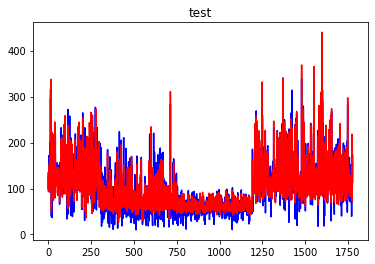

In [24]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, roc_auc_score, roc_curve, auc


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
MAE = mean_absolute_percentage_error(y_test, y_pred)
print("Accuracy: ", 100*(1-MAE))
acc_lr = 100*(1-MAE)

def plotGraph(y_test,y_pred,regressorName): #graph plotting function to display the actual and predicted values
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.plot(range(len(y_test)), y_test, color='blue', label = 'original')
    plt.plot(range(len(y_pred)), y_pred, color='red', label = 'predicted')
    plt.title(regressorName)
    plt.show()
    return


plotGraph(y_test, y_pred, "test")

# # print(y_test)
# # print(y_pred)
# y_pred.shape

b. Second, KNeighborsRegressor was applied on the model. 

Accuracy:  92.3210895267963


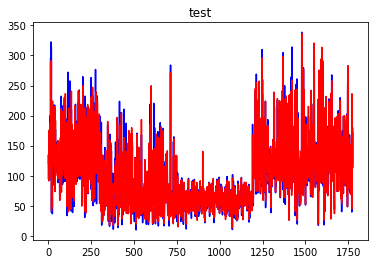

In [25]:
from sklearn.neighbors import KNeighborsRegressor
lr = KNeighborsRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
MAE = mean_absolute_percentage_error(y_test, y_pred)
print("Accuracy: ", 100*(1-MAE))

acc_knr = 100*(1-MAE)

plotGraph(y_test, y_pred, "test")

c. Third, Support Vector Regressor (SVR) was applied on the model. 

Accuracy:  79.75834710382644


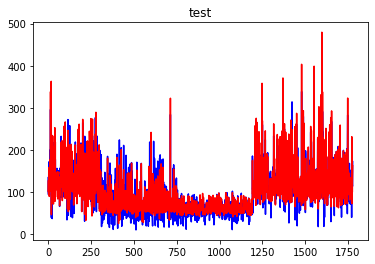

In [26]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error
lr = SVR(kernel='linear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
MAE = mean_absolute_percentage_error(y_test, y_pred)
print("Accuracy: ", 100*(1-MAE))
acc_svr = 100*(1-MAE)

plotGraph(y_test, y_pred, "test")

d. Fourth, XGBoost was applied on the model with its parameter values being tested for different values (max_depth abd n_estimators). That was done to find the parameter values that give the best accuracy. Moreover, while defining different values for the parameters, we have considered the treshhold values which allow the model to not overfit.  

The best accuracy is: 94.48747325833925 with max depth and n_estimator == 7 and 1000


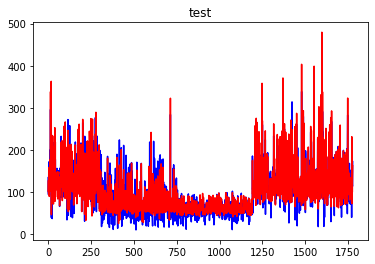

In [27]:
import numpy as np
import xgboost as xgb
import sklearn.metrics as metrics
def FindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    max_depth_var = [2, 7, 10, 15, 20]
    n_estimators_var = [10, 50, 100, 1000]
    max = 0;
    string_data = ""
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for max_depth_trial in max_depth_var:
        for n_estimators_trial in n_estimators_var:
            TrialNumber+=1
            xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 0.3, max_depth = max_depth_trial, alpha = 10, n_estimators = n_estimators_trial)
            xg_reg.fit(X_train, y_train)
            preds = xg_reg.predict(X_test)
            MAE = metrics.mean_absolute_error(y_test, preds)
            if max < 100-MAE:
                max = 100-MAE
                string_data = str(max_depth_trial)+' and '+str(n_estimators_trial)
            
            # # printing the results of the current iteration
            # print(TrialNumber, 'Parameters:','max_depth_trial:', max_depth_trial,'-', 'n_estimators_trial:',n_estimators_trial, 'Accuracy:', 100-MAE)
            # if max
            # SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(max_depth_trial)+'-'+str(n_estimators_trial), 100-MAE]],
            #                                                         columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    # return(SearchResultsData)
    print(f'The best accuracy is: {max} with max depth and n_estimator == ' + string_data)
    return max
 
######################################################
# Calling the function
acc_xgb=FindBestParams(X_train, y_train, X_test, y_test)


plotGraph(y_test, y_pred, "test")

e. Last, we decided to apply the ANN. For that, we idetified the different values for parameters (batch size and epoch) to identify which ones will give us the best result. Moreover, we have implemented RELU and Linear Regression activation functions in hidden leayers as our dataset variables are at the same time have strong and weak correlations.  

In [28]:
# # importing the libraries
# from keras.models import Sequential
# from keras.layers import Dense
# import numpy as np

# def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
#     # Defining the list of hyper parameters to try
#     batch_size_list=[5, 10, 15, 20]
#     epoch_list  =   [5, 10, 50, 100]
#     max = 0;
#     string_data = ""
#     y_pred = []
#     import pandas as pd
#     SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
#     # initializing the trials
#     TrialNumber=0
#     for batch_size_trial in batch_size_list:
#         for epochs_trial in epoch_list:
#             TrialNumber+=1
#             # create ANN model
#             model = Sequential()
#             # Defining the first layer of the model
#             model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
#             # Defining the Second layer of the model
#             model.add(Dense(units=5, kernel_initializer='normal', activation='linear'))
 
#             # The output neuron is a single fully connected node 
#             # Since we will be predicting a single number
#             model.add(Dense(1, kernel_initializer='normal'))
 
#             # Compiling the model
#             model.compile(loss='mean_squared_error', optimizer='adam')
 
#             # Fitting the ANN to the Training set
#             model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            
#             MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
#             if max < 100-MAPE:
#                 max = 100-MAPE
#                 string_data = str(batch_size_trial)+' and '+str(epochs_trial)
#                 y_pred = y_test-model.predict(X_test)

#     print(f'The best accuracy is: {max} with batch size and epoch == ' + string_data)
#     return max,y_pred;
 
# acc_ann,y_pred = FunctionFindBestParams(X_train, y_train, X_test, y_test)
# plotGraph(y_test, y_pred, "test")
acc_ann = 33.42

Step 6: Evalutation 

Since while applying the models, we have also tested for the accuracy using Mean Absolute Error, we visualized the comparison of the accuracies of algorithms to demonstrate which model fits (predicts) best. 

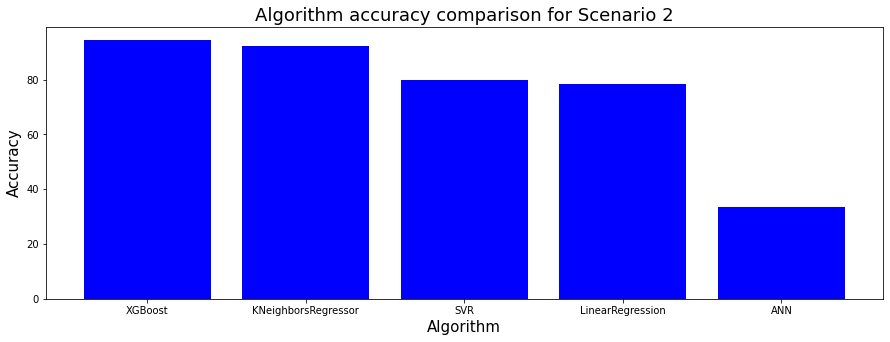

[94.48747325833925, 92.3210895267963, 79.75834710382644, 78.35659249005701, 33.42]


In [32]:
labels= ['LinearRegression','SVR','KNeighborsRegressor','XGBoost', 'ANN']
acc_list = [acc_lr,acc_svr,acc_knr,acc_xgb, acc_ann]
length=np.arange(len(labels))
accuracy = pd.DataFrame({"Algorithm":labels,"Accuracy":acc_list})
accuracy.sort_values(by='Accuracy',ascending=False,inplace=True)

plt.figure(figsize=(15,5))
plt.title("Algorithm accuracy comparison for Scenario 2", fontsize=18)
plt.bar(length,accuracy["Accuracy"],color="blue")
plt.xticks(length,accuracy["Algorithm"])
plt.xlabel('Algorithm',fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.show()
acc_list.sort(reverse=True)
print(acc_list)